<a href="https://colab.research.google.com/github/aaaaaamah99/Computer_Vision/blob/main/Week_1/CVTask_1_Lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train Medical Imaging Data Using Super Gradients**
# Arsitektur YOLO-NAS S


#Install Python Package

In [7]:
!pip install boto3 deprecated coverage sphinx-rtd-theme torchmetrics hydra-core omegaconf onnxruntime onnx einops treelib stringcase rapidfuzz json-tricks onnx-simplifier data-gradients
!pip show boto3 deprecated coverage sphinx-rtd-theme torchmetrics hydra-core omegaconf onnxruntime onnx einops treelib stringcase rapidfuzz json-tricks onnx-simplifier data-gradients


Name: boto3
Version: 1.34.28
Summary: The AWS SDK for Python
Home-page: https://github.com/boto/boto3
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: botocore, jmespath, s3transfer
Required-by: super-gradients
---
Name: Deprecated
Version: 1.2.14
Summary: Python @deprecated decorator to deprecate old python classes, functions or methods.
Home-page: https://github.com/tantale/deprecated
Author: Laurent LAPORTE
Author-email: tantale.solutions@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: wrapt
Required-by: super-gradients
---
Name: coverage
Version: 5.3.1
Summary: Code coverage measurement for Python
Home-page: https://github.com/nedbat/coveragepy
Author: Ned Batchelder and 138 others
Author-email: ned@nedbatchelder.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: data-gradients, super-gradients
---
Name: sphinx-rtd-theme

In [8]:
!pip install --upgrade numpy
!pip install fastapi kaleido python-multipart uvicorn


  Using cached numpy-1.26.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
super-gradients 3.5.0 requires numpy<=1.23, but you have numpy 1.26.3 which is incompatible.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


#Install SuperGradient

In [9]:
! pip install -qq super-gradients==3.5.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.0 which is incompatible.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


#Experiment Setup

#Import Dataloader

In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8Q4Z4axUIjr8Kb9cHz4O")
project = rf.workspace("luca-zedda").project("malaria_syn")
dataset = project.version(4).download("coco")


loading Roboflow workspace...
loading Roboflow project...


In [12]:
!pip install roboflow
from roboflow import Roboflow

# Install other necessary packages and modules as needed

# Initialize Roboflow with your API key
rf = Roboflow(api_key="8Q4Z4axUIjr8Kb9cHz4O")

# Specify the project and dataset details
project_name = "yolo5objectdetection"
project = rf.workspace(project_name).project("lung_cancer-1hpnl")
version_number = 5
dataset_name = "coco"

# Download the dataset using Roboflow
dataset = project.version(version_number).download(dataset_name)


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to lung_cancer-5 in coco:: 100%|██████████| 108/108 [00:00<00:00, 7393.38it/s]


In [13]:
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Specify the path to your lung cancer dataset
lung_cancer_dataset_path = "/content/lung_cancer-5"  # Replace with the actual path

# Define dataset and dataloader parameters
lung_cancer_dataset_params = {
    "root": lung_cancer_dataset_path,
    "transform": transforms.ToTensor(),  # Adjust the transformation as needed
}

lung_cancer_dataloader_params = {
    "batch_size": 32,
    "shuffle": True,
    "num_workers": 2,
    # ... other dataloader parameters ...
}

# Load lung cancer training dataset
train_dataset = ImageFolder(**lung_cancer_dataset_params)
train_dataloader = DataLoader(train_dataset, **lung_cancer_dataloader_params)

# Load lung cancer validation dataset
valid_dataset = ImageFolder(**lung_cancer_dataset_params)
valid_dataloader = DataLoader(valid_dataset, **lung_cancer_dataloader_params)

In [ ]:
!pip install roboflow
from roboflow import Roboflow
from pathlib import Path
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Initialize Roboflow with your API key
rf = Roboflow(api_key="8Q4Z4axUIjr8Kb9cHz4O")

# Specify the project and dataset details
project_name = "luca-zedda"
project = rf.workspace(project_name).project("malaria_syn")
version_number = 4
dataset_name = "coco"

# Download the dataset using Roboflow
dataset = project.version(version_number).download(dataset_name)

# Check the downloaded dataset information
print(dataset)

# Use the local path where the dataset is stored
local_dataset_path = Path(dataset.download_path)

# Define dataset and dataloader parameters
roboflow_dataset_params = {
    "root": local_dataset_path,
    "transform": transforms.ToTensor(),  # Adjust the transformation as needed
}

roboflow_dataloader_params = {
    "batch_size": 32,
    "shuffle": True,
    "num_workers": 2,
    # ... other dataloader parameters ...
}

# Load the Roboflow dataset using torchvision
roboflow_dataset = ImageFolder(**roboflow_dataset_params)
roboflow_dataloader = DataLoader(roboflow_dataset, **roboflow_dataloader_params)


loading Roboflow workspace...
loading Roboflow project...


AttributeError: 'Dataset' object has no attribute 'download_path'

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Specify the path to your local storage
local_dataset_path = "/content/malaria_syn_dataset"  # Replace with your desired local path

# Define dataset and dataloader parameters
roboflow_dataset_params = {
    "root": local_dataset_path,
    "transform": transforms.ToTensor(),  # Adjust the transformation as needed
}

roboflow_dataloader_params = {
    "batch_size": 32,
    "shuffle": True,
    "num_workers": 2,
    # ... other dataloader parameters ...
}

# Load the Roboflow dataset using torchvision
roboflow_dataset = ImageFolder(**roboflow_dataset_params)
roboflow_dataloader = DataLoader(roboflow_dataset, **roboflow_dataloader_params)

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Specify the path to your lung cancer dataset
lung_cancer_dataset_path = "/content/lung_cancer-5"  # Replace with the actual path

# Define dataset and dataloader parameters
lung_cancer_dataset_params = {
    "root": lung_cancer_dataset_path,
    "transform": transforms.ToTensor(),  # Adjust the transformation as needed
}

lung_cancer_dataloader_params = {
    "batch_size": 32,
    "shuffle": True,
    "num_workers": 2,
    # ... other dataloader parameters ...
}

# Load lung cancer training dataset
train_dataset = ImageFolder(**lung_cancer_dataset_params)
train_dataloader = DataLoader(train_dataset, **lung_cancer_dataloader_params)

# Load lung cancer validation dataset
valid_dataset = ImageFolder(**lung_cancer_dataset_params)
valid_dataloader = DataLoader(valid_dataset, **lung_cancer_dataloader_params)


In [14]:
import pprint

# Print dataloader parameters
print("Dataloader parameters:")
pprint.pprint({
    "batch_size": train_dataloader.batch_size,
    #"shuffle": train_dataloader.shuffle,
    "num_workers": train_dataloader.num_workers,
    # ... other dataloader parameters ...
})

# Print dataset parameters
print("\nDataset parameters:")
pprint.pprint({
    "root": train_dataloader.dataset.root,
    "transform": train_dataloader.dataset.transform,
    # ... other dataset parameters ...
})


Dataloader parameters:
{'batch_size': 32, 'num_workers': 2}

Dataset parameters:
{'root': '/content/lung_cancer-5', 'transform': ToTensor()}


In [15]:
from matplotlib import pyplot as plt

def show(images, labels, classes, rows=6, columns=5):
  fig = plt.figure(figsize=(10, 10))

  for i in range(1, columns * rows + 1):
      fig.add_subplot(rows, columns, i)
      plt.imshow(images[i-1].permute(1, 2, 0).clamp(0, 1))
      plt.xticks([])
      plt.yticks([])
      plt.title(f"{classes[labels[i-1]]}")

torch.Size([32, 3, 300, 300]) torch.Size([32])


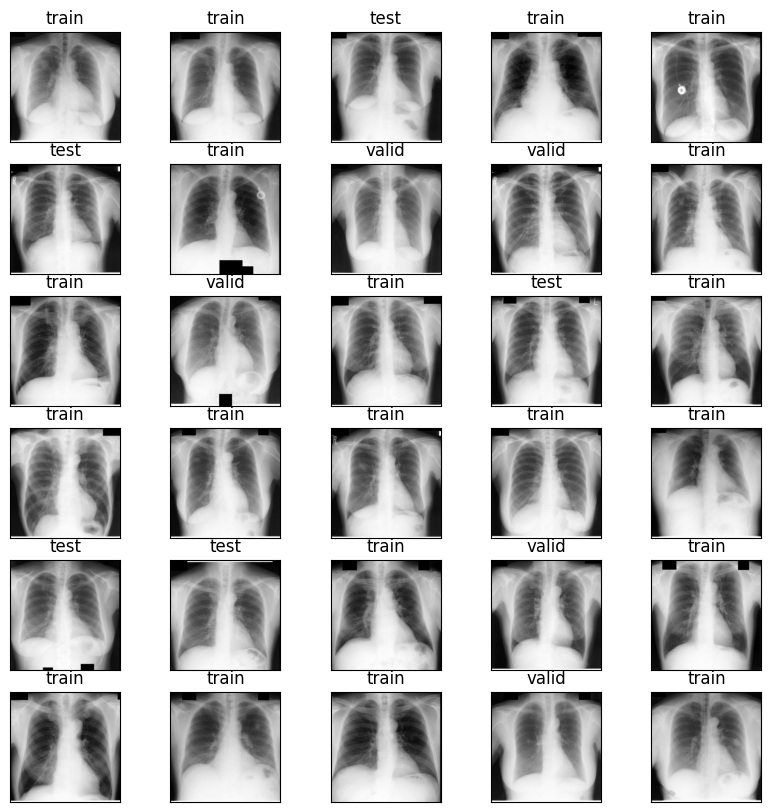

In [16]:
vis_images_train, vis_labels_train = next(iter(train_dataloader))
show(vis_images_train, vis_labels_train, classes=train_dataloader.dataset.classes)

print(vis_images_train.shape, vis_labels_train.shape)

torch.Size([32, 3, 300, 300]) torch.Size([32])


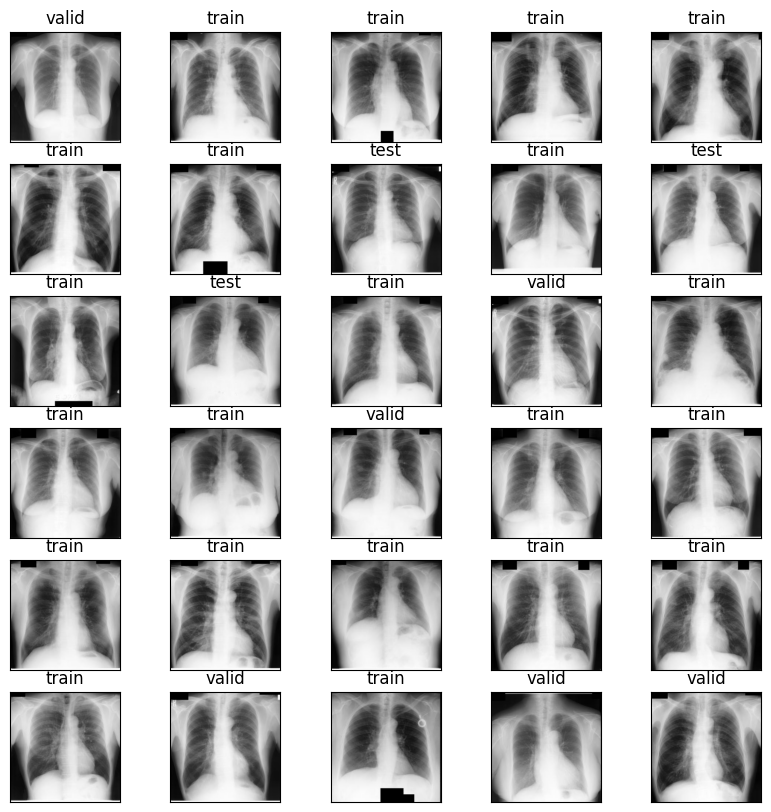

In [17]:
vis_images_val, vis_labels_val = next(iter(valid_dataloader))
show(vis_images_val, vis_labels_val, classes=train_dataloader.dataset.classes)

print(vis_images_val.shape, vis_labels_val.shape)

#Overide Parameters

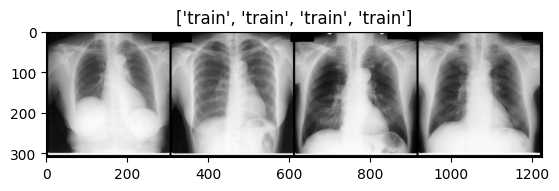

In [19]:
import numpy as np
from torchvision import transforms as T
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision  # Add this import for torchvision

# Specify the path to your lung cancer dataset
lung_cancer_dataset_path = "/content/lung_cancer-5"  # Replace with your actual path

# Transformations (you can adjust as needed)
transforms_vis = T.Compose([
    T.ToTensor(),
])

# Lung cancer dataset
lung_cancer_dataset = ImageFolder(root=lung_cancer_dataset_path, transform=transforms_vis)

# Dataloader
lung_cancer_dataloader = DataLoader(lung_cancer_dataset, batch_size=4, shuffle=True, num_workers=2)

# Function to show images
def show_images(images, labels, classes):
    img_grid = np.transpose(torchvision.utils.make_grid(images, padding=5), (1, 2, 0))
    plt.imshow(img_grid)
    plt.title([classes[label] for label in labels])
    plt.show()

# Visualize lung cancer images
lung_cancer_images, lung_cancer_labels = next(iter(lung_cancer_dataloader))
show_images(lung_cancer_images, lung_cancer_labels, classes=lung_cancer_dataset.classes)


#Architecture = Resnet18

In [20]:
from super_gradients.training import models
from super_gradients.common.object_names import Models

model = models.get(model_name=Models.RESNET18, num_classes=10, pretrained_weights="imagenet")

The console stream is logged into /root/sg_logs/console.log


[2024-01-26 02:17:40] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-01-26 02:17:50] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-01-26 02:17:50] WARNING - export.py - Failed to import pytorch_quantization
[2024-01-26 02:17:50] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
Downloading: "https://sghub.deci.ai/models/resnet18_imagenet.pth" to /root/.cache/torch/hub/checkpoints/resnet18_imagenet.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 28.7MB/s]
[2024-01-26 02:17:53] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture resnet18


#Training

In [28]:
from super_gradients.training import Trainer
from super_gradients.training import training_hyperparams

# you can see more recipes in super_gradients/recipes
training_params =  training_hyperparams.get("training_hyperparams/cifar10_resnet_train_params")


In [35]:
from super_gradients.training import Trainer
from super_gradients.training import training_hyperparams

training_params =  training_hyperparams.get("training_hyperparams/cifar10_resnet_train_params")


In [36]:
pprint.pprint("Training parameters")
pprint.pprint(training_params)

'Training parameters'
{'_convert_': 'all',
 'average_best_models': True,
 'batch_accumulate': 1,
 'ckpt_best_name': 'ckpt_best.pth',
 'ckpt_name': 'ckpt_latest.pth',
 'clip_grad_norm': None,
 'cosine_final_lr_ratio': 0.01,
 'criterion_params': {},
 'dataset_statistics': False,
 'ema': False,
 'ema_params': {'decay': 0.9999, 'decay_type': 'exp', 'beta': 15},
 'greater_metric_to_watch_is_better': True,
 'initial_lr': 0.1,
 'launch_tensorboard': False,
 'load_opt_params': True,
 'log_installed_packages': True,
 'loss': 'LabelSmoothingCrossEntropyLoss',
 'lr_cooldown_epochs': 0,
 'lr_decay_factor': 0.1,
 'lr_mode': 'StepLRScheduler',
 'lr_schedule_function': None,
 'lr_updates': array([100, 150, 200]),
 'lr_warmup_epochs': 0,
 'lr_warmup_steps': 0,
 'max_epochs': 250,
 'max_train_batches': None,
 'max_valid_batches': None,
 'metric_to_watch': 'Accuracy',
 'mixed_precision': False,
 'optimizer': 'SGD',
 'optimizer_params': {'weight_decay': 0.0001, 'momentum': 0.9},
 'phase_callbacks': [],
 

In [26]:
training_params["max_epochs"] = 15

In [46]:
train_params_path = "training_hyperparams/cifar10_resnet_train_params"
training_params = training_hyperparams.get(train_params_path)


In [50]:
import torch
import torchvision.models as models

# Instantiate ResNet18
model = models.resnet18()

# Other model configurations or modifications can be done based on your requirements


In [52]:
trainer = Trainer(experiment_name="lung_cancer", ckpt_root_dir="/content/lung_cancer-5")

trainer.train(model=model, training_params=training_params, train_loader=train_dataloader, valid_loader=valid_dataloader)


[2024-01-26 02:41:31] WARNING - sg_trainer.py - Train dataset size % batch_size != 0 and drop_last=False, this might result in smaller last batch.
[2024-01-26 02:41:31] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240126_024131_994012`
[2024-01-26 02:41:31] INFO - sg_trainer.py - Checkpoints directory: /content/lung_cancer-5/lung_cancer/RUN_20240126_024131_994012


The console stream is now moved to /content/lung_cancer-5/lung_cancer/RUN_20240126_024131_994012/console_Jan26_02_41_31.txt


[2024-01-26 02:41:32] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               0          (0 available on the machine)
    - Full dataset size:            100        (len(train_set))
    - Batch size per GPU:           32         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             32         (num_gpus * batch_size)
    - Effective Batch size:         32         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         4          (len(train_loader))
    - Gradient updates per epoch:   4          (len(train_loader) / batch_accumulate)
    - Model: ResNet  (11.69M parameters, 11.69M optimized)
    - Learning Rates and Weight Decays:
      - default: (11.69M parameters). LR: 0.1 (11.69M parameters) WD: 0.0001, (11.69M parameters)

[2024-01-26 02:41:32] INFO - sg_trainer.py - Started training for 250 epochs (0/249)

Validating: 100%|

SUMMARY OF EPOCH 0
├── Train
│   ├── Labelsmoothingcrossentropyloss = 5.0998
│   ├── Accuracy = 0.51
│   └── Top5 = 0.68
└── Validation
    ├── Labelsmoothingcrossentropyloss = 171.1412
    ├── Accuracy = 0.75
    └── Top5 = 1.0



Validating epoch 1: 100%|██████████| 4/4 [00:13<00:00,  3.42s/it]


SUMMARY OF EPOCH 1
├── Train
│   ├── Labelsmoothingcrossentropyloss = 5.1699
│   │   ├── Epoch N-1      = 5.0998 (↗ 0.0701)
│   │   └── Best until now = 5.0998 (↗ 0.0701)
│   ├── Accuracy = 0.71
│   │   ├── Epoch N-1      = 0.51   (↗ 0.2)
│   │   └── Best until now = 0.51   (↗ 0.2)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 0.68   (↗ 0.32)
│       └── Best until now = 0.68   (↗ 0.32)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 29824.701
    │   ├── Epoch N-1      = 171.1412 (↗ 29653.559)
    │   └── Best until now = 171.1412 (↗ 29653.559)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 2: 100%|██████████| 4/4 [00:14<00:00,  3.68s/it]


SUMMARY OF EPOCH 2
├── Train
│   ├── Labelsmoothingcrossentropyloss = 2.2542
│   │   ├── Epoch N-1      = 5.1699 (↘ -2.9157)
│   │   └── Best until now = 5.0998 (↘ -2.8456)
│   ├── Accuracy = 0.76
│   │   ├── Epoch N-1      = 0.71   (↗ 0.05)
│   │   └── Best until now = 0.71   (↗ 0.05)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 447242.84
    │   ├── Epoch N-1      = 29824.701 (↗ 417418.16)
    │   └── Best until now = 171.1412 (↗ 447071.7)
    ├── Accuracy = 0.15
    │   ├── Epoch N-1      = 0.75   (↘ -0.6)
    │   └── Best until now = 0.75   (↘ -0.6)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 3: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]


SUMMARY OF EPOCH 3
├── Train
│   ├── Labelsmoothingcrossentropyloss = 2.7798
│   │   ├── Epoch N-1      = 2.2542 (↗ 0.5256)
│   │   └── Best until now = 2.2542 (↗ 0.5256)
│   ├── Accuracy = 0.61
│   │   ├── Epoch N-1      = 0.76   (↘ -0.15)
│   │   └── Best until now = 0.76   (↘ -0.15)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 20335.133
    │   ├── Epoch N-1      = 447242.84 (↘ -426907.72)
    │   └── Best until now = 171.1412 (↗ 20163.992)
    ├── Accuracy = 0.15
    │   ├── Epoch N-1      = 0.15   (= 0.0)
    │   └── Best until now = 0.75   (↘ -0.6)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 4: 100%|██████████| 4/4 [00:13<00:00,  3.38s/it]


SUMMARY OF EPOCH 4
├── Train
│   ├── Labelsmoothingcrossentropyloss = 2.8426
│   │   ├── Epoch N-1      = 2.7798 (↗ 0.0628)
│   │   └── Best until now = 2.2542 (↗ 0.5885)
│   ├── Accuracy = 0.73
│   │   ├── Epoch N-1      = 0.61   (↗ 0.12)
│   │   └── Best until now = 0.76   (↘ -0.03)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 1917.3096
    │   ├── Epoch N-1      = 20335.133 (↘ -18417.822)
    │   └── Best until now = 171.1412 (↗ 1746.1686)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.15   (↗ 0.6)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 5: 100%|██████████| 4/4 [00:13<00:00,  3.40s/it]


SUMMARY OF EPOCH 5
├── Train
│   ├── Labelsmoothingcrossentropyloss = 2.5779
│   │   ├── Epoch N-1      = 2.8426 (↘ -0.2647)
│   │   └── Best until now = 2.2542 (↗ 0.3237)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.73   (↗ 0.02)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 337.88
    │   ├── Epoch N-1      = 1917.3096 (↘ -1579.4297)
    │   └── Best until now = 171.1412 (↗ 166.7388)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 6: 100%|██████████| 4/4 [00:13<00:00,  3.39s/it]


SUMMARY OF EPOCH 6
├── Train
│   ├── Labelsmoothingcrossentropyloss = 1.4123
│   │   ├── Epoch N-1      = 2.5779 (↘ -1.1656)
│   │   └── Best until now = 2.2542 (↘ -0.8419)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.75   (= 0.0)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 222.1421
    │   ├── Epoch N-1      = 337.88 (↘ -115.7379)
    │   └── Best until now = 171.1412 (↗ 51.0009)
    ├── Accuracy = 0.15
    │   ├── Epoch N-1      = 0.75   (↘ -0.6)
    │   └── Best until now = 0.75   (↘ -0.6)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 7: 100%|██████████| 4/4 [00:13<00:00,  3.31s/it]


SUMMARY OF EPOCH 7
├── Train
│   ├── Labelsmoothingcrossentropyloss = 1.0433
│   │   ├── Epoch N-1      = 1.4123 (↘ -0.369)
│   │   └── Best until now = 1.4123 (↘ -0.369)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.75   (= 0.0)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 117.8718
    │   ├── Epoch N-1      = 222.1421 (↘ -104.2703)
    │   └── Best until now = 171.1412 (↘ -53.2694)
    ├── Accuracy = 0.15
    │   ├── Epoch N-1      = 0.15   (= 0.0)
    │   └── Best until now = 0.75   (↘ -0.6)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 8: 100%|██████████| 4/4 [00:13<00:00,  3.30s/it]


SUMMARY OF EPOCH 8
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.825
│   │   ├── Epoch N-1      = 1.0433 (↘ -0.2183)
│   │   └── Best until now = 1.0433 (↘ -0.2183)
│   ├── Accuracy = 0.74
│   │   ├── Epoch N-1      = 0.75   (↘ -0.01)
│   │   └── Best until now = 0.76   (↘ -0.02)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 15.8555
    │   ├── Epoch N-1      = 117.8718 (↘ -102.0163)
    │   └── Best until now = 117.8718 (↘ -102.0163)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.15   (↗ 0.6)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 9: 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]


SUMMARY OF EPOCH 9
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.7742
│   │   ├── Epoch N-1      = 0.825  (↘ -0.0508)
│   │   └── Best until now = 0.825  (↘ -0.0508)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.74   (↗ 0.01)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 5.9341
    │   ├── Epoch N-1      = 15.8555 (↘ -9.9214)
    │   └── Best until now = 15.8555 (↘ -9.9214)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 10: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]


SUMMARY OF EPOCH 10
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.8512
│   │   ├── Epoch N-1      = 0.7742 (↗ 0.077)
│   │   └── Best until now = 0.7742 (↗ 0.077)
│   ├── Accuracy = 0.73
│   │   ├── Epoch N-1      = 0.75   (↘ -0.02)
│   │   └── Best until now = 0.76   (↘ -0.03)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 2.5889
    │   ├── Epoch N-1      = 5.9341 (↘ -3.3452)
    │   └── Best until now = 5.9341 (↘ -3.3452)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 11: 100%|██████████| 4/4 [00:13<00:00,  3.49s/it]


SUMMARY OF EPOCH 11
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.8474
│   │   ├── Epoch N-1      = 0.8512 (↘ -0.0038)
│   │   └── Best until now = 0.7742 (↗ 0.0733)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.73   (↗ 0.02)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.9237
    │   ├── Epoch N-1      = 2.5889 (↘ -1.6652)
    │   └── Best until now = 2.5889 (↘ -1.6652)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 12: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]


SUMMARY OF EPOCH 12
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.762
│   │   ├── Epoch N-1      = 0.8474 (↘ -0.0854)
│   │   └── Best until now = 0.7742 (↘ -0.0122)
│   ├── Accuracy = 0.74
│   │   ├── Epoch N-1      = 0.75   (↘ -0.01)
│   │   └── Best until now = 0.76   (↘ -0.02)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 1.4599
    │   ├── Epoch N-1      = 0.9237 (↗ 0.5362)
    │   └── Best until now = 0.9237 (↗ 0.5362)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 13: 100%|██████████| 4/4 [00:13<00:00,  3.50s/it]


SUMMARY OF EPOCH 13
├── Train
│   ├── Labelsmoothingcrossentropyloss = 1.0573
│   │   ├── Epoch N-1      = 0.762  (↗ 0.2953)
│   │   └── Best until now = 0.762  (↗ 0.2953)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.74   (↗ 0.01)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 1.2112
    │   ├── Epoch N-1      = 1.4599 (↘ -0.2487)
    │   └── Best until now = 0.9237 (↗ 0.2874)
    ├── Accuracy = 0.74
    │   ├── Epoch N-1      = 0.75   (↘ -0.01)
    │   └── Best until now = 0.75   (↘ -0.01)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 14: 100%|██████████| 4/4 [00:14<00:00,  3.74s/it]


SUMMARY OF EPOCH 14
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.9084
│   │   ├── Epoch N-1      = 1.0573 (↘ -0.1489)
│   │   └── Best until now = 0.762  (↗ 0.1464)
│   ├── Accuracy = 0.63
│   │   ├── Epoch N-1      = 0.75   (↘ -0.12)
│   │   └── Best until now = 0.76   (↘ -0.13)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 1.246
    │   ├── Epoch N-1      = 1.2112 (↗ 0.0349)
    │   └── Best until now = 0.9237 (↗ 0.3223)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.74   (↗ 0.01)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 15: 100%|██████████| 4/4 [00:14<00:00,  3.51s/it]


SUMMARY OF EPOCH 15
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.9654
│   │   ├── Epoch N-1      = 0.9084 (↗ 0.0569)
│   │   └── Best until now = 0.762  (↗ 0.2034)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.63   (↗ 0.12)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 1.7538
    │   ├── Epoch N-1      = 1.246  (↗ 0.5078)
    │   └── Best until now = 0.9237 (↗ 0.8301)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 16: 100%|██████████| 4/4 [00:14<00:00,  3.64s/it]


SUMMARY OF EPOCH 16
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.9128
│   │   ├── Epoch N-1      = 0.9654 (↘ -0.0526)
│   │   └── Best until now = 0.762  (↗ 0.1508)
│   ├── Accuracy = 0.74
│   │   ├── Epoch N-1      = 0.75   (↘ -0.01)
│   │   └── Best until now = 0.76   (↘ -0.02)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.7812
    │   ├── Epoch N-1      = 1.7538 (↘ -0.9726)
    │   └── Best until now = 0.9237 (↘ -0.1425)
    ├── Accuracy = 0.72
    │   ├── Epoch N-1      = 0.75   (↘ -0.03)
    │   └── Best until now = 0.75   (↘ -0.03)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 17: 100%|██████████| 4/4 [00:13<00:00,  3.49s/it]


SUMMARY OF EPOCH 17
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.8777
│   │   ├── Epoch N-1      = 0.9128 (↘ -0.0351)
│   │   └── Best until now = 0.762  (↗ 0.1157)
│   ├── Accuracy = 0.65
│   │   ├── Epoch N-1      = 0.74   (↘ -0.09)
│   │   └── Best until now = 0.76   (↘ -0.11)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.7569
    │   ├── Epoch N-1      = 0.7812 (↘ -0.0243)
    │   └── Best until now = 0.7812 (↘ -0.0243)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.72   (↗ 0.03)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 18: 100%|██████████| 4/4 [00:14<00:00,  3.59s/it]


SUMMARY OF EPOCH 18
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.8006
│   │   ├── Epoch N-1      = 0.8777 (↘ -0.0771)
│   │   └── Best until now = 0.762  (↗ 0.0386)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.65   (↗ 0.1)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.9568
    │   ├── Epoch N-1      = 0.7569 (↗ 0.1998)
    │   └── Best until now = 0.7569 (↗ 0.1998)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 19: 100%|██████████| 4/4 [00:13<00:00,  3.38s/it]


SUMMARY OF EPOCH 19
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.8381
│   │   ├── Epoch N-1      = 0.8006 (↗ 0.0374)
│   │   └── Best until now = 0.762  (↗ 0.0761)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.75   (= 0.0)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.7519
    │   ├── Epoch N-1      = 0.9568 (↘ -0.2049)
    │   └── Best until now = 0.7569 (↘ -0.005)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 20: 100%|██████████| 4/4 [00:14<00:00,  3.53s/it]


SUMMARY OF EPOCH 20
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.7188
│   │   ├── Epoch N-1      = 0.8381 (↘ -0.1193)
│   │   └── Best until now = 0.762  (↘ -0.0432)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.75   (= 0.0)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.7095
    │   ├── Epoch N-1      = 0.7519 (↘ -0.0424)
    │   └── Best until now = 0.7519 (↘ -0.0424)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 21: 100%|██████████| 4/4 [00:14<00:00,  3.58s/it]


SUMMARY OF EPOCH 21
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.7064
│   │   ├── Epoch N-1      = 0.7188 (↘ -0.0124)
│   │   └── Best until now = 0.7188 (↘ -0.0124)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.75   (= 0.0)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6869
    │   ├── Epoch N-1      = 0.7095 (↘ -0.0226)
    │   └── Best until now = 0.7095 (↘ -0.0226)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 22: 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]


SUMMARY OF EPOCH 22
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6948
│   │   ├── Epoch N-1      = 0.7064 (↘ -0.0116)
│   │   └── Best until now = 0.7064 (↘ -0.0116)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.75   (= 0.0)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6977
    │   ├── Epoch N-1      = 0.6869 (↗ 0.0108)
    │   └── Best until now = 0.6869 (↗ 0.0108)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 23: 100%|██████████| 4/4 [00:14<00:00,  3.51s/it]


SUMMARY OF EPOCH 23
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6924
│   │   ├── Epoch N-1      = 0.6948 (↘ -0.0023)
│   │   └── Best until now = 0.6948 (↘ -0.0023)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.75   (= 0.0)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.7083
    │   ├── Epoch N-1      = 0.6977 (↗ 0.0106)
    │   └── Best until now = 0.6869 (↗ 0.0214)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 24: 100%|██████████| 4/4 [00:14<00:00,  3.52s/it]


SUMMARY OF EPOCH 24
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6982
│   │   ├── Epoch N-1      = 0.6924 (↗ 0.0058)
│   │   └── Best until now = 0.6924 (↗ 0.0058)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.75   (= 0.0)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.743
    │   ├── Epoch N-1      = 0.7083 (↗ 0.0347)
    │   └── Best until now = 0.6869 (↗ 0.0561)
    ├── Accuracy = 0.74
    │   ├── Epoch N-1      = 0.75   (↘ -0.01)
    │   └── Best until now = 0.75   (↘ -0.01)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 25: 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]


SUMMARY OF EPOCH 25
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.7226
│   │   ├── Epoch N-1      = 0.6982 (↗ 0.0243)
│   │   └── Best until now = 0.6924 (↗ 0.0301)
│   ├── Accuracy = 0.73
│   │   ├── Epoch N-1      = 0.75   (↘ -0.02)
│   │   └── Best until now = 0.76   (↘ -0.03)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6662
    │   ├── Epoch N-1      = 0.743  (↘ -0.0767)
    │   └── Best until now = 0.6869 (↘ -0.0207)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.74   (↗ 0.01)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 26: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]


SUMMARY OF EPOCH 26
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6775
│   │   ├── Epoch N-1      = 0.7226 (↘ -0.045)
│   │   └── Best until now = 0.6924 (↘ -0.0149)
│   ├── Accuracy = 0.74
│   │   ├── Epoch N-1      = 0.73   (↗ 0.01)
│   │   └── Best until now = 0.76   (↘ -0.02)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6555
    │   ├── Epoch N-1      = 0.6662 (↘ -0.0108)
    │   └── Best until now = 0.6662 (↘ -0.0108)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 27: 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]


SUMMARY OF EPOCH 27
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6666
│   │   ├── Epoch N-1      = 0.6775 (↘ -0.011)
│   │   └── Best until now = 0.6775 (↘ -0.011)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.74   (↗ 0.01)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6649
    │   ├── Epoch N-1      = 0.6555 (↗ 0.0094)
    │   └── Best until now = 0.6555 (↗ 0.0094)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 28: 100%|██████████| 4/4 [00:15<00:00,  3.80s/it]


SUMMARY OF EPOCH 28
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6829
│   │   ├── Epoch N-1      = 0.6666 (↗ 0.0163)
│   │   └── Best until now = 0.6666 (↗ 0.0163)
│   ├── Accuracy = 0.76
│   │   ├── Epoch N-1      = 0.75   (↗ 0.01)
│   │   └── Best until now = 0.76   (= 0.0)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6807
    │   ├── Epoch N-1      = 0.6649 (↗ 0.0159)
    │   └── Best until now = 0.6555 (↗ 0.0253)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.75   (= 0.0)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 29: 100%|██████████| 4/4 [00:14<00:00,  3.51s/it]


SUMMARY OF EPOCH 29
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6652
│   │   ├── Epoch N-1      = 0.6829 (↘ -0.0177)
│   │   └── Best until now = 0.6666 (↘ -0.0014)
│   ├── Accuracy = 0.73
│   │   ├── Epoch N-1      = 0.76   (↘ -0.03)
│   │   └── Best until now = 0.76   (↘ -0.03)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.7489
    │   ├── Epoch N-1      = 0.6807 (↗ 0.0682)
    │   └── Best until now = 0.6555 (↗ 0.0935)
    ├── Accuracy = 0.73
    │   ├── Epoch N-1      = 0.75   (↘ -0.02)
    │   └── Best until now = 0.75   (↘ -0.02)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 30: 100%|██████████| 4/4 [00:14<00:00,  3.52s/it]


SUMMARY OF EPOCH 30
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.7801
│   │   ├── Epoch N-1      = 0.6652 (↗ 0.115)
│   │   └── Best until now = 0.6652 (↗ 0.115)
│   ├── Accuracy = 0.7
│   │   ├── Epoch N-1      = 0.73   (↘ -0.03)
│   │   └── Best until now = 0.76   (↘ -0.06)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.7598
    │   ├── Epoch N-1      = 0.7489 (↗ 0.0109)
    │   └── Best until now = 0.6555 (↗ 0.1044)
    ├── Accuracy = 0.73
    │   ├── Epoch N-1      = 0.73   (= 0.0)
    │   └── Best until now = 0.75   (↘ -0.02)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 31: 100%|██████████| 4/4 [00:13<00:00,  3.50s/it]


SUMMARY OF EPOCH 31
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6822
│   │   ├── Epoch N-1      = 0.7801 (↘ -0.098)
│   │   └── Best until now = 0.6652 (↗ 0.017)
│   ├── Accuracy = 0.74
│   │   ├── Epoch N-1      = 0.7    (↗ 0.04)
│   │   └── Best until now = 0.76   (↘ -0.02)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6424
    │   ├── Epoch N-1      = 0.7598 (↘ -0.1174)
    │   └── Best until now = 0.6555 (↘ -0.0131)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.73   (↗ 0.02)
    │   └── Best until now = 0.75   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 32: 100%|██████████| 4/4 [00:14<00:00,  3.54s/it]
[2024-01-26 03:16:31] INFO - base_sg_logger.py - Checkpoint saved in /content/lung_cancer-5/lung_cancer/RUN_20240126_024131_994012/ckpt_best.pth
[2024-01-26 03:16:31] INFO - sg_trainer.py - Best checkpoint overriden: validation Accuracy: 0.7599999904632568


SUMMARY OF EPOCH 32
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6404
│   │   ├── Epoch N-1      = 0.6822 (↘ -0.0418)
│   │   └── Best until now = 0.6652 (↘ -0.0248)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.74   (↗ 0.01)
│   │   └── Best until now = 0.76   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6345
    │   ├── Epoch N-1      = 0.6424 (↘ -0.0079)
    │   └── Best until now = 0.6424 (↘ -0.0079)
    ├── Accuracy = 0.76
    │   ├── Epoch N-1      = 0.75   (↗ 0.01)
    │   └── Best until now = 0.75   (↗ 0.01)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 33: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]


SUMMARY OF EPOCH 33
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6513
│   │   ├── Epoch N-1      = 0.6404 (↗ 0.0109)
│   │   └── Best until now = 0.6404 (↗ 0.0109)
│   ├── Accuracy = 0.77
│   │   ├── Epoch N-1      = 0.75   (↗ 0.02)
│   │   └── Best until now = 0.76   (↗ 0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6564
    │   ├── Epoch N-1      = 0.6345 (↗ 0.0219)
    │   └── Best until now = 0.6345 (↗ 0.0219)
    ├── Accuracy = 0.76
    │   ├── Epoch N-1      = 0.76   (= 0.0)
    │   └── Best until now = 0.76   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 34: 100%|██████████| 4/4 [00:14<00:00,  3.51s/it]


SUMMARY OF EPOCH 34
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6592
│   │   ├── Epoch N-1      = 0.6513 (↗ 0.0078)
│   │   └── Best until now = 0.6404 (↗ 0.0188)
│   ├── Accuracy = 0.76
│   │   ├── Epoch N-1      = 0.77   (↘ -0.01)
│   │   └── Best until now = 0.77   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6322
    │   ├── Epoch N-1      = 0.6564 (↘ -0.0242)
    │   └── Best until now = 0.6345 (↘ -0.0023)
    ├── Accuracy = 0.76
    │   ├── Epoch N-1      = 0.76   (= 0.0)
    │   └── Best until now = 0.76   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 35: 100%|██████████| 4/4 [00:14<00:00,  3.65s/it]


SUMMARY OF EPOCH 35
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6391
│   │   ├── Epoch N-1      = 0.6592 (↘ -0.0201)
│   │   └── Best until now = 0.6404 (↘ -0.0013)
│   ├── Accuracy = 0.74
│   │   ├── Epoch N-1      = 0.76   (↘ -0.02)
│   │   └── Best until now = 0.77   (↘ -0.03)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6629
    │   ├── Epoch N-1      = 0.6322 (↗ 0.0307)
    │   └── Best until now = 0.6322 (↗ 0.0307)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.76   (↘ -0.01)
    │   └── Best until now = 0.76   (↘ -0.01)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 36: 100%|██████████| 4/4 [00:14<00:00,  3.55s/it]


SUMMARY OF EPOCH 36
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6964
│   │   ├── Epoch N-1      = 0.6391 (↗ 0.0573)
│   │   └── Best until now = 0.6391 (↗ 0.0573)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.74   (↗ 0.01)
│   │   └── Best until now = 0.77   (↘ -0.02)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6957
    │   ├── Epoch N-1      = 0.6629 (↗ 0.0328)
    │   └── Best until now = 0.6322 (↗ 0.0635)
    ├── Accuracy = 0.76
    │   ├── Epoch N-1      = 0.75   (↗ 0.01)
    │   └── Best until now = 0.76   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 37: 100%|██████████| 4/4 [00:15<00:00,  3.96s/it]


SUMMARY OF EPOCH 37
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.7146
│   │   ├── Epoch N-1      = 0.6964 (↗ 0.0182)
│   │   └── Best until now = 0.6391 (↗ 0.0754)
│   ├── Accuracy = 0.72
│   │   ├── Epoch N-1      = 0.75   (↘ -0.03)
│   │   └── Best until now = 0.77   (↘ -0.05)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.7336
    │   ├── Epoch N-1      = 0.6957 (↗ 0.0378)
    │   └── Best until now = 0.6322 (↗ 0.1013)
    ├── Accuracy = 0.76
    │   ├── Epoch N-1      = 0.76   (= 0.0)
    │   └── Best until now = 0.76   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 38: 100%|██████████| 4/4 [00:14<00:00,  3.61s/it]


SUMMARY OF EPOCH 38
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6519
│   │   ├── Epoch N-1      = 0.7146 (↘ -0.0627)
│   │   └── Best until now = 0.6391 (↗ 0.0128)
│   ├── Accuracy = 0.77
│   │   ├── Epoch N-1      = 0.72   (↗ 0.05)
│   │   └── Best until now = 0.77   (= 0.0)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6612
    │   ├── Epoch N-1      = 0.7336 (↘ -0.0724)
    │   └── Best until now = 0.6322 (↗ 0.029)
    ├── Accuracy = 0.76
    │   ├── Epoch N-1      = 0.76   (= 0.0)
    │   └── Best until now = 0.76   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 39: 100%|██████████| 4/4 [00:14<00:00,  3.53s/it]


SUMMARY OF EPOCH 39
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.7748
│   │   ├── Epoch N-1      = 0.6519 (↗ 0.1229)
│   │   └── Best until now = 0.6391 (↗ 0.1357)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.77   (↘ -0.02)
│   │   └── Best until now = 0.77   (↘ -0.02)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.754
    │   ├── Epoch N-1      = 0.6612 (↗ 0.0928)
    │   └── Best until now = 0.6322 (↗ 0.1218)
    ├── Accuracy = 0.75
    │   ├── Epoch N-1      = 0.76   (↘ -0.01)
    │   └── Best until now = 0.76   (↘ -0.01)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 40: 100%|██████████| 4/4 [00:14<00:00,  3.72s/it]


SUMMARY OF EPOCH 40
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.7066
│   │   ├── Epoch N-1      = 0.7748 (↘ -0.0681)
│   │   └── Best until now = 0.6391 (↗ 0.0675)
│   ├── Accuracy = 0.75
│   │   ├── Epoch N-1      = 0.75   (= 0.0)
│   │   └── Best until now = 0.77   (↘ -0.02)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6488
    │   ├── Epoch N-1      = 0.754  (↘ -0.1052)
    │   └── Best until now = 0.6322 (↗ 0.0166)
    ├── Accuracy = 0.76
    │   ├── Epoch N-1      = 0.75   (↗ 0.01)
    │   └── Best until now = 0.76   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 41: 100%|██████████| 4/4 [00:14<00:00,  3.55s/it]
[2024-01-26 03:26:11] INFO - base_sg_logger.py - Checkpoint saved in /content/lung_cancer-5/lung_cancer/RUN_20240126_024131_994012/ckpt_best.pth
[2024-01-26 03:26:11] INFO - sg_trainer.py - Best checkpoint overriden: validation Accuracy: 0.7699999809265137


SUMMARY OF EPOCH 41
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6326
│   │   ├── Epoch N-1      = 0.7066 (↘ -0.074)
│   │   └── Best until now = 0.6391 (↘ -0.0065)
│   ├── Accuracy = 0.76
│   │   ├── Epoch N-1      = 0.75   (↗ 0.01)
│   │   └── Best until now = 0.77   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6417
    │   ├── Epoch N-1      = 0.6488 (↘ -0.0071)
    │   └── Best until now = 0.6322 (↗ 0.0095)
    ├── Accuracy = 0.77
    │   ├── Epoch N-1      = 0.76   (↗ 0.01)
    │   └── Best until now = 0.76   (↗ 0.01)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Validating epoch 42: 100%|██████████| 4/4 [00:14<00:00,  3.74s/it]


SUMMARY OF EPOCH 42
├── Train
│   ├── Labelsmoothingcrossentropyloss = 0.6299
│   │   ├── Epoch N-1      = 0.6326 (↘ -0.0028)
│   │   └── Best until now = 0.6326 (↘ -0.0028)
│   ├── Accuracy = 0.76
│   │   ├── Epoch N-1      = 0.76   (= 0.0)
│   │   └── Best until now = 0.77   (↘ -0.01)
│   └── Top5 = 1.0
│       ├── Epoch N-1      = 1.0    (= 0.0)
│       └── Best until now = 1.0    (= 0.0)
└── Validation
    ├── Labelsmoothingcrossentropyloss = 0.6245
    │   ├── Epoch N-1      = 0.6417 (↘ -0.0172)
    │   └── Best until now = 0.6322 (↘ -0.0077)
    ├── Accuracy = 0.77
    │   ├── Epoch N-1      = 0.77   (= 0.0)
    │   └── Best until now = 0.77   (= 0.0)
    └── Top5 = 1.0
        ├── Epoch N-1      = 1.0    (= 0.0)
        └── Best until now = 1.0    (= 0.0)



Train epoch 43:   0%|          | 0/4 [00:00<?, ?it/s]

#Predict

In [55]:
from PIL import Image
import numpy as np
import requests
import os
from super_gradients.training.processing.processing import ComposeProcessing, NormalizeImage, Resize, StandardizeImage, ImagePermute

# Load the best model that we trained
best_model = models.get(Models.RESNET18,
                        num_classes=10,
                        checkpoint_path=os.path.join(trainer.checkpoints_dir_path,"ckpt_best.pth"))
best_model.eval()

image_processor = ComposeProcessing(
    [Resize(size=64), StandardizeImage(),
     NormalizeImage(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]), ImagePermute()]
)

classes = train_dataloader.dataset.classes

best_model.set_dataset_processing_params(image_processor=image_processor, class_names=classes)

prediction = best_model.predict("https://d1jyxxz9imt9yb.cloudfront.net/medialib/3078/image/s1300x1300/IP202207_GlassFrogs_009_365211_reduced.jpg")


prediction.show()

AttributeError: module 'torchvision.models' has no attribute 'get'

#Convert to ONNX

In [53]:
import torch
onnx_filename = f"{experiment_name}_{model_name}.onnx"

best_model.eval()
best_model.prep_model_for_conversion(input_size=[1, 3, 32, 32]) # image shape of CIFAR10 images
dummy_input = torch.randn([1, 3, 32, 32], device=next(best_model.parameters()).device)

torch.onnx.export(best_model, dummy_input, onnx_filename)

Train epoch 43:   0%|          | 0/4 [00:05<?, ?it/s]
[2024-01-26 03:27:22] INFO - sg_trainer.py - 
[MODEL TRAINING EXECUTION HAS BEEN INTERRUPTED]... Please wait until SOFT-TERMINATION process finishes and saves all of the Model Checkpoints and log files before terminating...
[2024-01-26 03:27:22] INFO - sg_trainer.py - For HARD Termination - Stop the process again
[2024-01-26 03:27:22] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


NameError: name 'experiment_name' is not defined